# Exercise Lecture 5
**Learning Outcomes:**
* Creation and usage of lists and tuples
* Iteration over collections
* (NumPy Arrays)

# Yahtzee Game Creation

Outland Trondheim wants to create a fancy new online yahtzee game engine, and they want you to create the dice throwing mechanism.
While the people that work there are mainly board game sales persons, they happen to know that lists are important when handling more than one value, so before you get to start on the game, they want to test your basic list skills, and hand you a set of tasks.

## Task 1: Basic List Handling
1. Create a list containing the number 0 through 9

In [1]:
l = [i for i in range(10)]

2. Change the last number in the list to five

In [2]:
l[-1] = 5

3. Create a function that returns the first half o f a list, and use it on you list

In [3]:
def half_list(l):
    return l[:len(l)//2]

l = half_list(l)

4. Create a function that creates a copy of all elements of a list except the first and last, and returns a list containing those elements

In [4]:
def sub_list(l):
    return l[1:-1]

l = sub_list(l)
l

[1, 2, 3]

## Task 2: Dice Throwing
Yahtzee consists of many rounds, and in each round you throw six dice and try to achieve a good score (the scoring depends on the current round). However, sometimes you want to save dice from previous throws, so you’ll only throw e.g. 4 dice.

Create a function that takes in a number n and returns a list containing n random integers between one and six (inclusive)

For creating random integers, use the following tip:

In [5]:
import random
k = random.randint(1, 6)
k

1

In [6]:
def throw_dice(n):
    return [random.randint(1, 6) for _ in range(n)]

dice = throw_dice(6)
dice

[1, 4, 3, 6, 2, 4]

## Task 3: Simple Scoring
Scoring in Yahtzee is a function of the number of dice with a given value and that value. For example, in the first six rounds, the score is given by the number of dice equal to the round number times the round number, e.g.
$$s_i=n_i \cdot i$$

Create a function that takes as input a list of dice and an integer n∊[1, 6], and returns the number of dice equal to n.

In [7]:
def count_equal_dice(dice, n):
    count = 0
    for d in dice:
        if d == n:
            count += 1
    return count

count_equal_dice(dice, 6)

1

Create a function that throws dice 6 times, and calculates the score of the first six rounds as explained above (assume there’s only one throw per round)

In [8]:
def first_six_rounds():
    score = 0
    for i in range(1, 7):
        dice = throw_dice(6)
        count = count_equal_dice(dice, i)
        score += count * i
    return score

first_six_rounds()

21

## Task 4: More Scoring
The rest of the rounds of Yahtzee are scored differently. Almost all of them require you to get a combination of values such as two pairs, three equals, one pair + three equals, etc. The score is given by the sum of values of the dice used to make the combination, and you automatically get the highest possible score given your dice.

Create a function that takes as input a list and an integer n, and returns the highest value of which there is at least n instances in the list. If there’s no such value, the function should return -1.

In [9]:
def highest_n_equal(dice, n):
    for i in range(6, 0, -1):
        if count_equal_dice(dice, i) >= n:
            return i
    return -1

highest_n_equal(dice, 1)

6

At this point, Outland has performed a user study, and found out that there’s not really a market for online yahtzee. They end the project, and you’re left with a half finished game and empty pockets (finishing the game could be an interesting task to do on your own). However, due to your outstanding work, they recommended you to their accountant SuperEconomy Inc., who needed an IT guru to create a new system for keeping track of salaries.

# Salary System
SuperEconomy Inc. wants a system to keep track of their employees and their salaries. For interoperability with other systems, the information should be kept in a list of lists of the form \[salary, name\]

In [10]:
salaries = [[300000, "John Doe"],[450000, "Jane Doe"]]

Create a function that takes as input a name, a salary, and the list of salaries, and adds a new sublist with the correct information.

In [11]:
def add_person(name, salary, employees):
    employees.append([salary, name])

add_person("Sam Gamgee", 42000, salaries)
salaries

[[300000, 'John Doe'], [450000, 'Jane Doe'], [42000, 'Sam Gamgee']]

To help management keep track of the employees, create a function that prints the list of salaries in a nice way. For extra kudos with your employer, the list should be sorted on the salary.

In [12]:
def print_employees(employees):
    for row in sorted(employees, reverse=True):
        print(f"{row[0]}\t{row[1]}")

print_employees(salaries)

450000	Jane Doe
300000	John Doe
42000	Sam Gamgee


Despite their awesome salary management system, SuperEconomy Inc. has come into economical problems, and has to let some employees go.
As they are good-hearted people, they want to affect as few people as possible, and so decides to always fire the person with the highest salary, so as to save as much as possible per firing.

Create a function that takes as input the list of salaries and a number x, the amount the company needs to save in salaries. The function should return a new list consisting of the names and salaries of the people that will be fired to save that amount. The function should also remove the people from the list of employees.

In [13]:
def fire_people(employees, need_to_save):
    saved = 0
    fired = []
    for employee in sorted(employees, reverse=True):
        if saved >= need_to_save:
            return fired
        
        # Fire the highest-income employee
        fired.append(employee)
        employees.remove(employee)
        saved += employee[0]
    return fired

fired = fire_people(salaries, 460000)

print("Fired:")
print_employees(fired)
print("\nRemaining:")
print_employees(salaries)

Fired:
450000	Jane Doe
300000	John Doe

Remaining:
42000	Sam Gamgee


# NumPy

The people at the support group for lecturers that can’t come up with backstories want you to demonstrate your mathematical proficiency, as they easily become wowed by vectorized operations

Perform the following operations:
1. Create a matrix $A$ consisting of 10 rows, each consisting of the numbers 1 through 10
2. Calculate $B$, the transpose of $A$
3. Create a vector $c=\left[-1, 1, -1, 1, -1, 1, -1, 1, -1, 1\right]$
4. Calculate the product $D=A\otimes c \times (A \oslash B)$, where $\otimes$ is pointwise muliplication, $\times$ is matrix multiplication, and $\oslash$ is pointwise division
5. Finally, calculate the linear interpolation between $D$ and its transpose, $E = .5D + .5D^T$ 

In [26]:
import numpy as np
A = np.array([[i for i in range(1, 11)] for _ in range(10)])
B = A.transpose()
c = np.array([-1, 1, -1, 1, -1, 1, -1, 1, -1, 1])

D = np.matmul(A * c, A / B)

E = .5 * D + .5 * D.transpose()
E

array([[ 5.55111512e-17,  8.32667268e-17, -2.77555756e-17,
         1.38777878e-16,  2.77555756e-17, -8.32667268e-17,
        -1.94289029e-16,  2.49800181e-16,  1.38777878e-16,
         2.77555756e-17],
       [ 8.32667268e-17,  1.11022302e-16,  0.00000000e+00,
         1.66533454e-16,  5.55111512e-17, -5.55111512e-17,
        -1.66533454e-16,  2.77555756e-16,  1.66533454e-16,
         5.55111512e-17],
       [-2.77555756e-17,  0.00000000e+00, -1.11022302e-16,
         5.55111512e-17, -5.55111512e-17, -1.66533454e-16,
        -2.77555756e-16,  1.66533454e-16,  5.55111512e-17,
        -5.55111512e-17],
       [ 1.38777878e-16,  1.66533454e-16,  5.55111512e-17,
         2.22044605e-16,  1.11022302e-16,  0.00000000e+00,
        -1.11022302e-16,  3.33066907e-16,  2.22044605e-16,
         1.11022302e-16],
       [ 2.77555756e-17,  5.55111512e-17, -5.55111512e-17,
         1.11022302e-16,  0.00000000e+00, -1.11022302e-16,
        -2.22044605e-16,  2.22044605e-16,  1.11022302e-16,
         0.

The people at the support group for lecturers that can’t come up with backstories are a tougher crowd than you imagined. Further impress them by showing how you’ve actually created beautiful, abstract art by running the following code (assuming you named the product $D$). This requires that matplotlib is installed (default in anaconda, otherwise install by typing `pip install matplotlib` in a terminal.

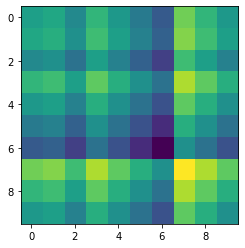

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(E)
plt.show()

# Exam 2014, Task 3
NB! Document is only available in New Norwegian (Nynorsk) online, so this is a freely translated version.

You're to process data from a weather-station for a range of days. The data is saved as floats in a table (list of lists), called `weatherData`. Each row (inner list) representes measurements for *one day*, and has three elements of different kinds of measurements. The three types of measurements are maximum temperature, minimum temperature, and precipitation. Vi refer to the days such that data in the first row of `weatherData` is for day number 1, second row (`weatherData[1]`) is for for day number two, etc. Example of weatherData:

In [16]:
weatherData = [
    [12.0, 2.4, 8.2],
    [6.1, 0.6, 11.9],
    [8.3, -3.5, 0.0],
    [11.6, -5.2, 0.0],
    [15.3, 2.8, 14.3]
]

## Task 1: Weather Stats
Write a function `weatherStats` that takes as input `weatherData`. The function should go through the data list, and from it write a summary as below. In other words, it should write out the number of days in the period, the total precipitation of the whole period, and show the highest and lowest temperatures along with the day it occured.

```
>>> weatherStats(weatherData)
There are 5 days in the period.
The highest temperature was 15.3 C on day number 5
The lowest temperature was -5.2 C on day number 4
There was a total of 34.4 mm rain in the period
>>>
```

In [17]:
def weatherStats(weatherData):
    n_days = len(weatherData)
    max_temp = -float('inf')
    max_day = -1
    min_temp = float('inf')
    min_day = -1
    total_rain = 0
    
    for i, data in enumerate(weatherData):
        if max_temp < data[0]:
            max_temp = data[0]
            max_day = i
        if min_temp > data[1]:
            min_temp = data[1]
            min_day = i
        total_rain += data[2]
    
    print(f"There are {n_days} days in the period.")
    print(f"The highest temperature was {max_temp} C on day number {max_day + 1}")
    print(f"The lowest temperature was {min_temp} C on day number {min_day + 1}")
    print(f"There was a total of 34.4mm rain in the period.")

In [18]:
weatherStats(weatherData)

There are 5 days in the period.
The highest temperature was 15.3 C on day number 5
The lowest temperature was -5.2 C on day number 4
There was a total of 34.4mm rain in the period.


## Task 2: Coldest Three Days
Write a function `coldestThreeDays` that takes as input the `weatherData`. The function should find the period of three consecutive days with the lowest mean minimum temperature through the period. It should return the number of the first day in this three-day period. If there are more than one period with the same temperature, only the last one should be returned. An example of running the function is shown below:
```
>>> coldestThreeDays(weatherData)
2
>>>
```

In [19]:
def coldestThreeDays(weatherData):
    min_temp = float('inf')
    min_day = -1
    for i in range(len(weatherData) - 2):
        temp = (weatherData[i][1] + weatherData[i + 1][1] + weatherData[i + 2][1]) / 3
        if temp <= min_temp:
            min_temp = temp
            min_day = i
    return min_day + 1

coldestThreeDays(weatherData)

2

## Task 3: Extra Data
The weather station has just reported data for another day. It comes in the form of a string, saved in the variable `extraData` as shown below

In [20]:
extraData = "max=23.5, min=9.3, 5.1mm"

Write a function `addNewDay` that takes as input `extraData` and `weatherData` and returns a new version av weatherData which is updatedwith the new data at the end of the table.

Example of running the function:
```
>>> for row in weatherData:
        print(row)
[12.0, 2.4, 8.2]
[6.1, 0.6, 11.9]
[8.3, -3.5, 0.0]
[11.6, -5.2, 0.0]
[15.3, 2.8, 14.3]
>>>
>>> extraData
'max=23.5, min=9.3, 5.1mm'
>>>
>>> weatherData = addNewDay(extraData,weatherData)
>>> for row in weatherData:
        print(row)
[12.0, 2.4, 8.2]
[6.1, 0.6, 11.9]
[8.3, -3.5, 0.0]
[11.6, -5.2, 0.0]
[15.3, 2.8, 14.3]
[23.5, 9.3, 5.1]
>>>
```

In [21]:
def addNewDay(extraData, weatherData):
    info = extraData.split(',')
    max_temp = info[0].split("=")
    max_temp = float(max_temp[-1])
    
    min_temp = info[1].split("=")
    min_temp = float(min_temp[-1])
    
    precipitation = float(info[2][:-2])
    
    weatherData.append([max_])